# The Sparks Foundation - Data Science & Business Analytics Internship
## Task 3 - Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
### Name- Anurag Gogoi
## Problem statement: As a business manager, try to find out the weak areas where you can work to make more profit.
## Aim: What all business problems you can derive by exploring the data?
## Dataset link: https://bit.ly/3i4rbWl
## STEP 1 : IMPORT ALL THE REQUIRED LIBRARIES.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## READING THE DATA

In [4]:
df = pd.read_csv("C://Users//ASUS//Documents//Data science//SampleSuperstore.csv")
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [5]:
df.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.shape

(9994, 13)

In [8]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [11]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

## STEP 2: CLEANING THE DATA

In [12]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### Since there are no null values, we move onto our next step.
## STEP 3: RELATIONSHIP ANALYSIS
### 1) CORRELATION MATRIX

In [13]:
correlation = df.corr()

<AxesSubplot:>

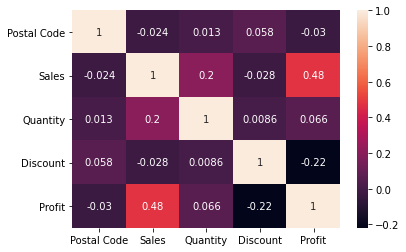

In [15]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,
            annot=True)

#### Observation 1 = Postal Code has almost no relations with the other parameters in the data. Hence, we drop the Postal Code column.

In [16]:
df1 = df.drop(columns=["Postal Code", "Country"], axis=1)

In [17]:
df1

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


<AxesSubplot:>

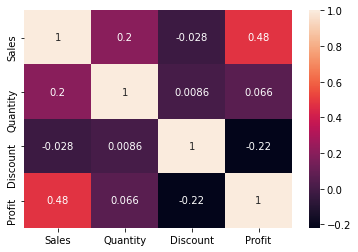

In [18]:
correlation = df1.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,
            annot=True)

#### Observation 2 = From the table, we observe that 'Quantity' and 'Discount' are almost uncorrelated. Also, there is least correlation between 'Profit' and 'Quantity'.
#### Observation 3 = There is maximum correlation between 'Sales and 'Profit'.

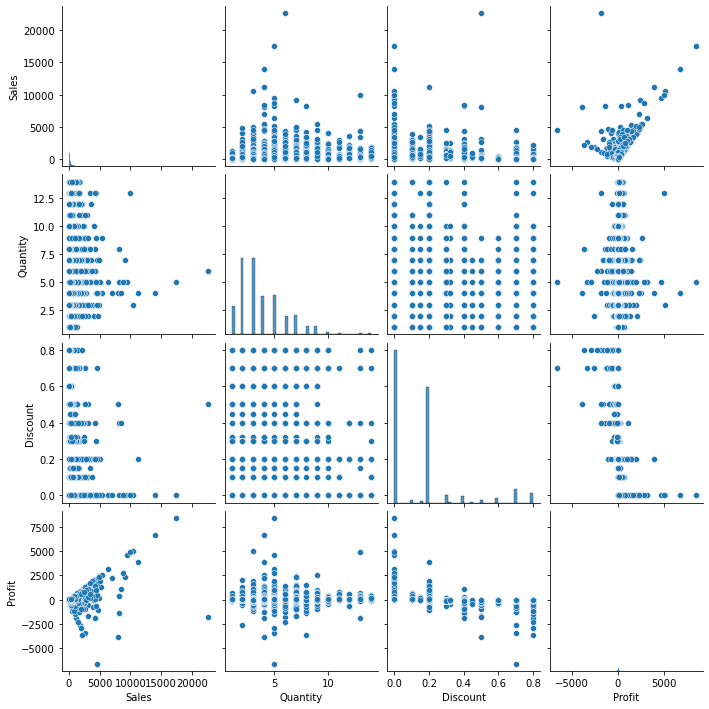

In [19]:
sns.pairplot(df1)


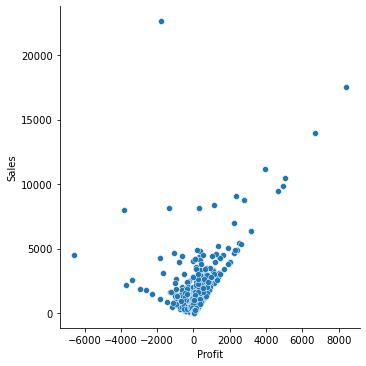

In [20]:
sns.relplot(x= 'Profit', y= 'Sales', data= df1)

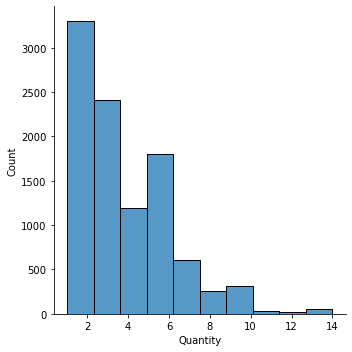

In [22]:
sns.displot(df1['Quantity'],bins=10)

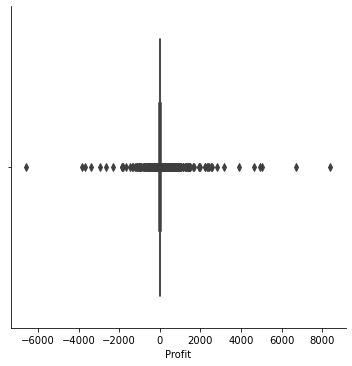

In [23]:
sns.catplot(x='Profit', kind='box', data=df1)

## STEP 4: DATA OBSERVATION

In [24]:
df1['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

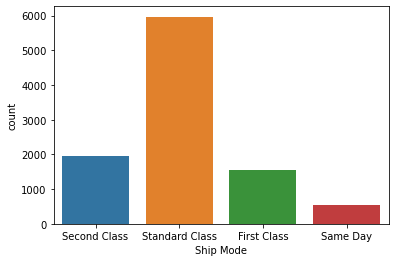

In [25]:
sns.countplot(x=df1['Ship Mode'])

#### Observation 4: 'Standard Class' has the most number of values counts, i.e., it has maximum Sales while the column 'Same Day' has the least Sales .

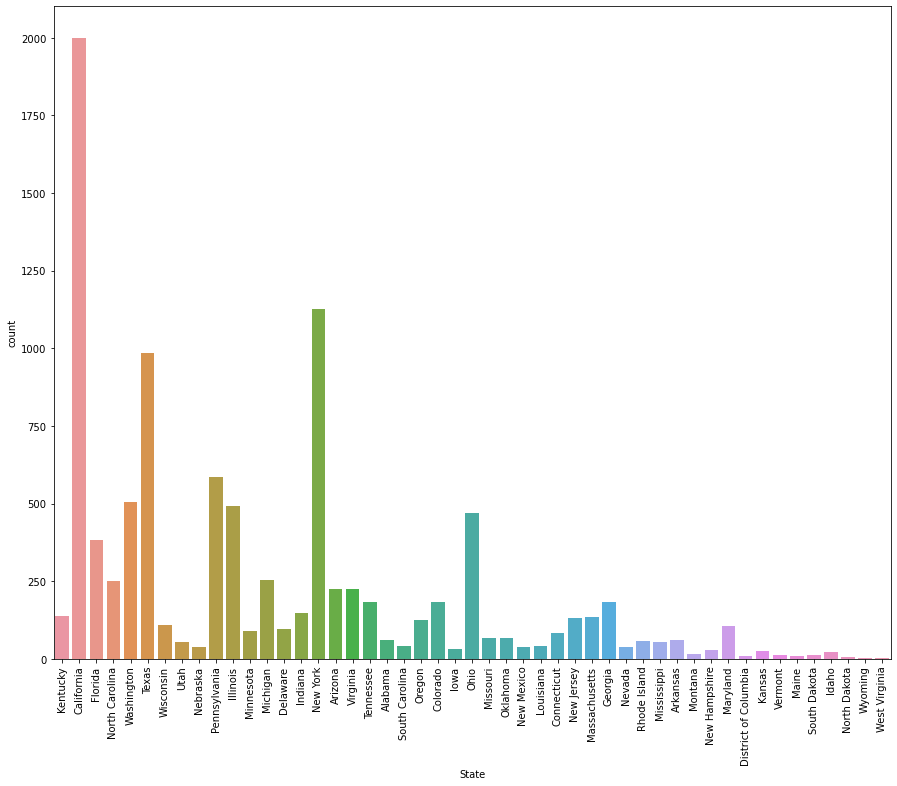

In [26]:
plt.figure(figsize=(15,12))
sns.countplot(x='State', data=df1)
plt.xticks(rotation=90)
plt.show()

#### Observation 6 = From the graph, we are able to observe that the 'State - California' has the maximum/highest number of buyers.